In [1]:
from sklearn import preprocessing 
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
digit= load_digits()
x=digit.data
y=digit.target

In [3]:
x.shape, y.shape

((1797L, 64L), (1797L,))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn import model_selection

In [6]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.3,random_state=42)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
model=KNeighborsClassifier()

In [9]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
pred=model.predict(x_test)

In [11]:
kfold=model_selection.KFold(n_splits=10,random_state=7)

# accuracy

In [12]:
results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring='accuracy')

In [13]:
results.sum()/10

0.9738485412787089

# Classification report

In [14]:
report=classification_report(y_test,pred)

In [15]:
print(report)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        53
          1       1.00      1.00      1.00        50
          2       1.00      1.00      1.00        47
          3       0.98      1.00      0.99        54
          4       0.98      1.00      0.99        60
          5       0.98      0.98      0.98        66
          6       1.00      1.00      1.00        53
          7       1.00      1.00      1.00        55
          8       1.00      1.00      1.00        43
          9       0.98      0.95      0.97        59

avg / total       0.99      0.99      0.99       540



In [16]:
data=pd.DataFrame({'actual':y_test,'prediction':pred})
data.head()

,actual,prediction
0,6,6
1,9,9
2,3,3
3,7,7
4,2,2


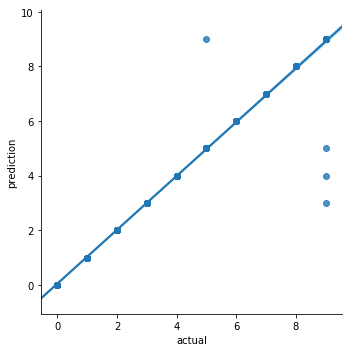

In [17]:
sns.lmplot('actual','prediction',data)

# confusion_matrix

In [18]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
predicted=model.predict(x_test)

In [20]:
matrix=confusion_matrix(y_test,predicted)

In [21]:
print(matrix)

[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 65  0  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  1  1  1  0  0  0 56]]


# R2 matrix

In [22]:
results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring='r2')

In [23]:
results

array([0.79070984, 0.96508651, 0.9865416 , 0.89711804, 0.86423228,
       0.93159295, 0.96400498, 0.93248526, 0.93913773, 0.9148542 ])

# Knn score

In [24]:
model.score(x_test,y_test)

0.9925925925925926